In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn as sns; sns.set_theme(color_codes=True)


![Table](tableS.png)

In [2]:
# create df

# Initiate values
data = [[1,1,100,0.5],[2,1,100,0.5],[3,2,97,1],[4,2,96,1],[5,3,89,2],
        [6,3,88,3],[7,3,88,3],[8,1,98,1],[9,4,78,4],[10,5,75,5]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['day', 'difficulty', 'efficiency', 'covered_material'])

# print dataframe
df

,day,difficulty,efficiency,covered_material
0,1,1,100,0.5
1,2,1,100,0.5
2,3,2,97,1.0
3,4,2,96,1.0
4,5,3,89,2.0
5,6,3,88,3.0
6,7,3,88,3.0
7,8,1,98,1.0
8,9,4,78,4.0
9,10,5,75,5.0


<AxesSubplot:title={'center':'Progress over days'}, xlabel='day'>

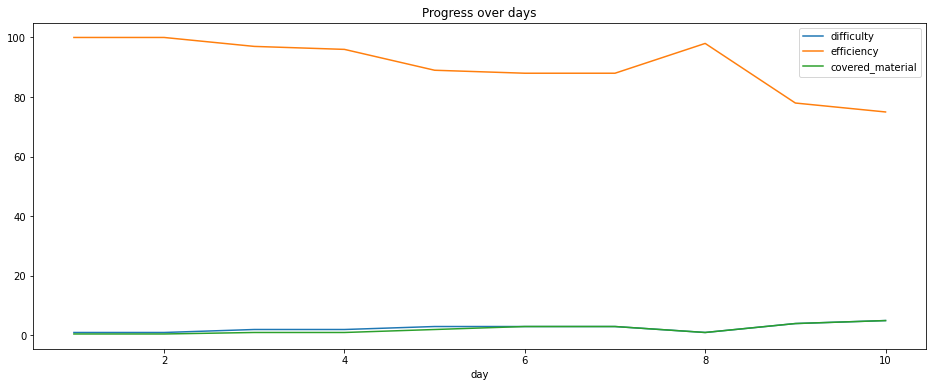

In [3]:
# plot the graph
df.plot(x='day',figsize = (16,6), xlabel='day', title = 'Progress over days')


<AxesSubplot:title={'center':'Progress over days (normalised)'}, xlabel='day'>

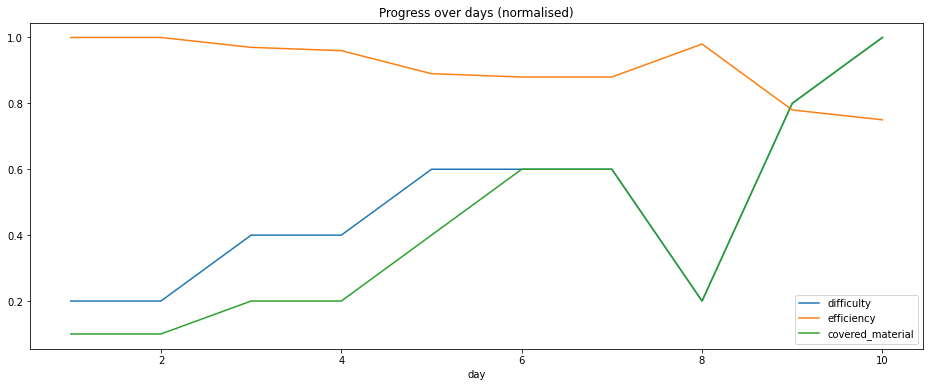

In [4]:
# normalize values to get a nicer graph
data = df

max_val_1 = df['difficulty'].max()
max_val_2 = df['efficiency'].max()
max_val_3 = df['covered_material'].max()

data['difficulty'] = df['difficulty'].apply(lambda x: x / max_val_1) 
data['efficiency'] = df['efficiency'].apply(lambda x: x / max_val_2) 
data['covered_material'] = df['covered_material'].apply(lambda x: x / max_val_3) 

data.plot(x='day',figsize = (16,6), xlabel='day', title = 'Progress over days (normalised)')


<AxesSubplot:title={'center':'covered_material vs efficiency'}, xlabel='efficiency', ylabel='covered_material'>

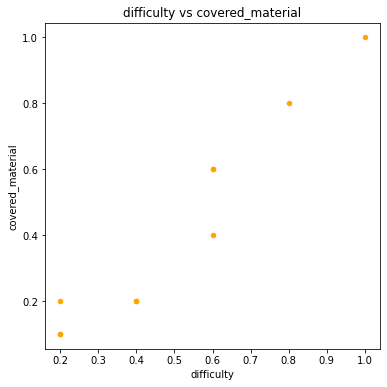

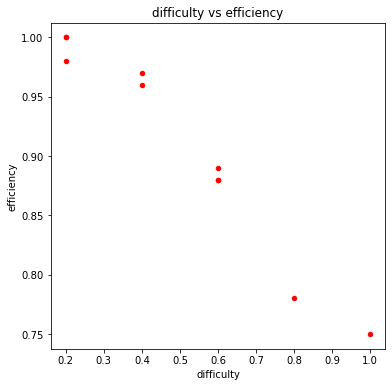

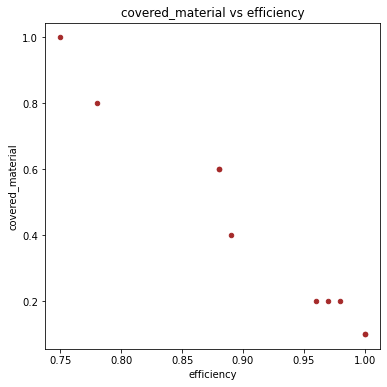

In [5]:
# set x and y as one of the features ['difficulty', 'covered_material', 'efficiency']

df.plot(x ='difficulty', y = 'covered_material', figsize = (6,6), 
           title = 'difficulty vs covered_material', kind = 'scatter', color = 'orange')

df.plot(x ='difficulty', y = 'efficiency', figsize = (6,6), 
           title = 'difficulty vs efficiency', kind = 'scatter', color = 'red')

df.plot(x ='efficiency', y = 'covered_material', figsize = (6,6), 
           title = 'covered_material vs efficiency', kind = 'scatter', color = 'brown')
          

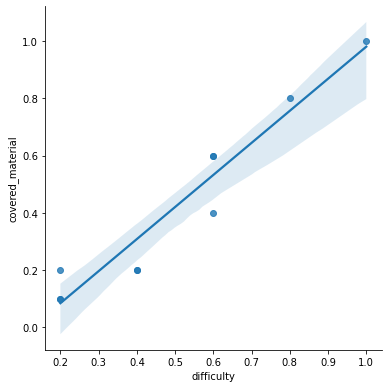

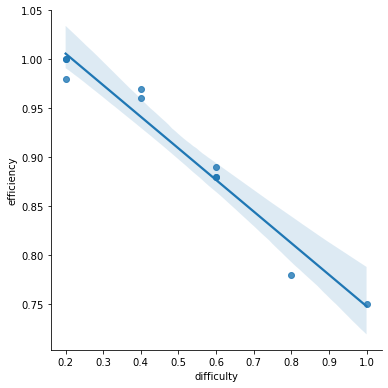

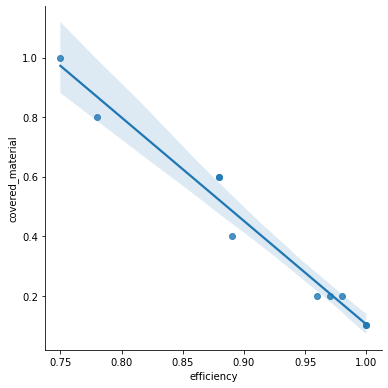

In [6]:
# plot the best fit for each pair of features

g1 = sns.lmplot(x="difficulty", y="covered_material", data=df, height = 5.5)

g2 = sns.lmplot(x="difficulty", y="efficiency", data=df, height = 5.5)

g3 = sns.lmplot(x="efficiency", y="covered_material", data=df, height = 5.5)

In [9]:
# calculate correlations
col1 = 'difficulty'
col2 = 'covered_material'
col3 = 'efficiency'

correlation1 = df[col1].corr(df[col2])
print("Correlation between " , col1 , ' and ' , col2 , ' is ', correlation1)

correlation2 = df[col1].corr(df[col3])
print("Correlation between " , col1 , ' and ' , col3 , ' is ', correlation2)


correlation3 = df[col2].corr(df[col3])
print("Correlation between " , col2 , ' and ' , col3 , ' is ', correlation3)

Correlation between  difficulty  and  covered_material  is  0.9622895002290538
Correlation between  difficulty  and  efficiency  is  -0.9778525978035475
Correlation between  covered_material  and  efficiency  is  -0.984247198695034


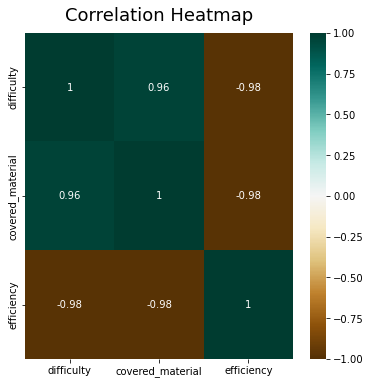

In [18]:
# plot correlation matrix

features = df[[col1, col2, col3]]

plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

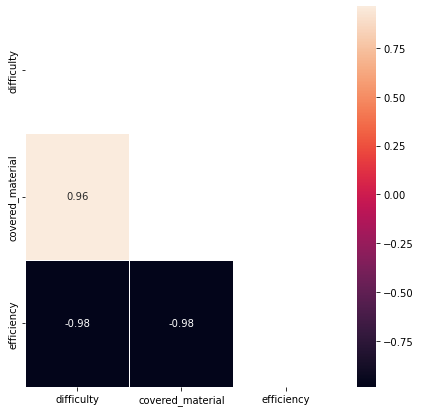

In [21]:
# heatmap 

plt.figure(figsize = (7, 7))

corr = features.corr() # correlation of all features
mask = np.triu(np.ones_like(corr, dtype = bool)) # reshaping matrix into triangular shape

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

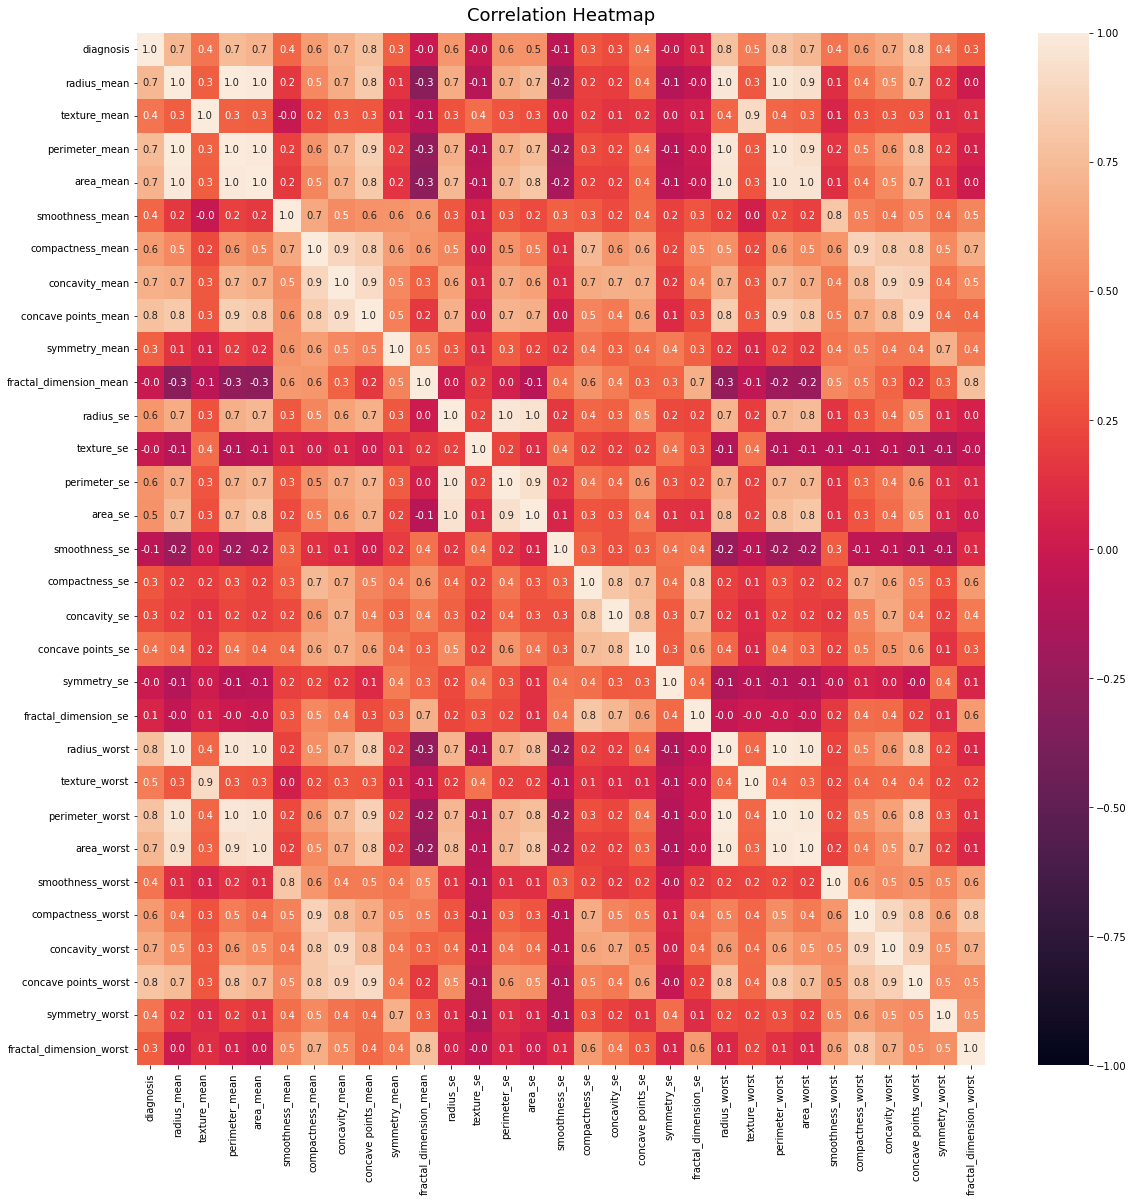

In [24]:
# project heatmap

project = pd.read_csv('cancer.csv')
project.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
project['diagnosis'] = project['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

plt.figure(figsize=(19, 19))
heatmap = sns.heatmap(project.corr(), vmin=-1, vmax=1, annot=True, fmt = ".1f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

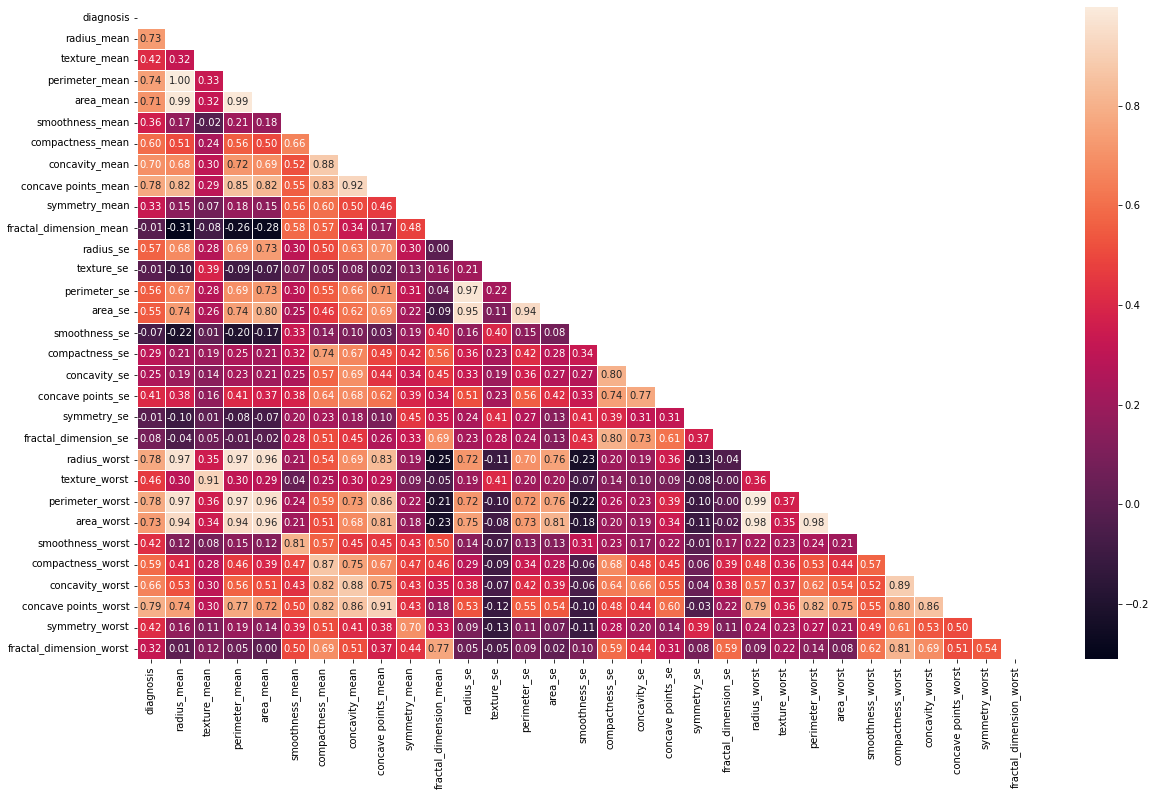

In [56]:
plt.figure(figsize = (20, 12))

corr_proj = project.corr() # correlation of all features
mask = np.triu(np.ones_like(corr_proj, dtype = bool)) # for reshaping matrix into triangular shape

sns.heatmap(corr_proj, mask = mask, linewidths = 1, annot = True, fmt = ".2f") # plot the heatmap
plt.show()

Positive correlation = 0.9873571700566123


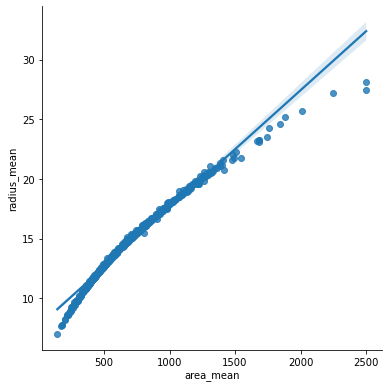

In [35]:
# plot the best fit for some pair of features

correlation1 = project['area_mean'].corr(project['radius_mean'])
print('Positive correlation = ' + str(correlation1))
g1 = sns.lmplot(x="area_mean", y="radius_mean", data=project, height = 5.5)


Negative correlation = -0.31163082630929023


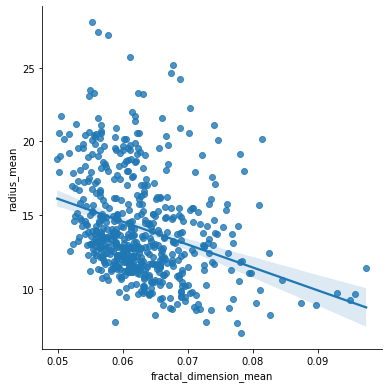

In [36]:
correlation2 = project['fractal_dimension_mean'].corr(project['radius_mean'])
print('Negative correlation = ' + str(correlation2))
g2 = sns.lmplot(x="fractal_dimension_mean", y="radius_mean", data=project, height = 5.5)


No correlation = 0.00011099507262946526


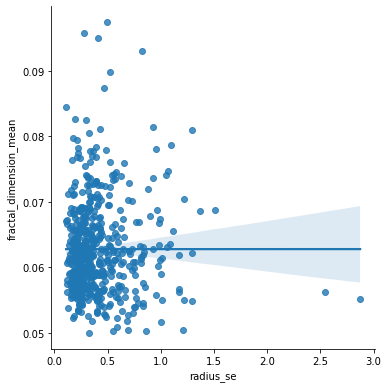

In [37]:

correlation3 = project['radius_se'].corr(project['fractal_dimension_mean'])
print('No correlation = ' + str(correlation3))
g3 = sns.lmplot(x="radius_se", y="fractal_dimension_mean", data=project, height = 5.5)
